In [1]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Source import Source
import numpy as np

## Simulation of Random Walk Propagation

Initialize the simulation by calling Simulation(). The class instance simulation contains all information relevant for the complete simulation.

In [2]:
simulation = Simulation()

init simulation completed


### 1) Source of Particles

First, we have to define a source of particles that we want to propagate. 

##### Particle properties of source
The emitted particles need to have the following properties:

- **gyro radius**: $r_g = \frac{E}{c\cdot q \cdot \sqrt{b^2+B²}}$, with $E, c, q$ denoting, the particle's energy, the speed of light and the particle's charge, respectively. $b, B$ are the rms-values of the turbulence and background field, respectively. Only needed for determining the characteristic time-scale of the initial, ballistic phase of the perpendicular diffuion. 
- **diffusion tensor**: the diagonal elements of the diagonalized diffusion tensor are needed to determine the characteristics of the transport. Provide the quantity $\kappa = [\kappa_{xx}, \kappa_{yy}, \kappa_{zz}]$.

In [3]:
gyro_radius = 30.0
diffusion_tensor = np.array([1.0, 1.0, 100.0], dtype=np.float32)

##### Properties of source

The source of particles need the following properties:

- **source position**
- **number of particles**
- **particle properties**: gyro radius & diffusion tensor

Finally, only add the source to the simulation.

In [4]:
source_position = np.zeros(3, dtype=np.float32)
nr_particles = 500
source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)

### 2) Propagation Module

Add the propagation module that you want to use:

- **random walk**: Fast method that propagates individual particles along random walks. The overall behaviour is governed by a generalized telegraph equation: $\frac{\partial f}{\partial t} = \sum_i \tau_i \frac{\partial^2 f}{\partial t^2} = \sum_i \kappa_i \frac{\partial^2 f}{\partial x_i^2}$
- others coming soon...

In [5]:
step_size = 1.0
propagation = Propagation(step_size)
steps = 10**5
t_max = 10**5
time = np.linspace(1, t_max, steps, dtype=np.float32)

### -> Run Simulation

Add all moduels needed to the simulation and run it!

In [6]:
simulation.addParticles(source)
simulation.addPropagation(propagation, time)
data = simulation.runSimulation()

## Analizing Simulation Data

In [7]:
import pandas as pd
df = pd.DataFrame(data).T
df.columns = ['id', 't', 'x', 'y', 'z']
df

,id,t,x,y,z
0,0.0,1.0,-0.577350,-0.577350,-0.577350
1,1.0,1.0,-0.577350,-0.577350,-0.577350
2,2.0,1.0,-0.577350,0.577350,0.577350
3,3.0,1.0,0.577350,-0.577350,0.577350
4,4.0,1.0,-0.577350,-0.577350,0.577350
...,...,...,...,...,...
549495,495.0,99001.0,-666.838623,666.838623,305.418335
549496,496.0,99001.0,1005.154907,-1005.154907,1144.881836
549497,497.0,99001.0,-101.036102,101.036102,1243.038574
549498,498.0,99001.0,-385.094147,-385.094147,1068.666260


In [8]:
nr_particles = 500
x = data[2]#df['x'].values
z = data[4]#df['x'].values
t = data[1]#df['t'].values
times = []
kappa_xx = []
kappa_zz = []
for j in range(int(len(x)/nr_particles)):
    t_j = t[j*nr_particles]
    kappa_xx_current = 0
    kappa_zz_current = 0
    for i in range(nr_particles):
        x_i = x[j*nr_particles+i]
        z_i = z[j*nr_particles+i]
        kappa_xx_current = kappa_xx_current + x_i**2
        kappa_zz_current = kappa_zz_current + z_i**2
    kappa_xx.append(kappa_xx_current/(2*t_j))
    kappa_zz.append(kappa_zz_current/(2*t_j))
    times.append(t_j)

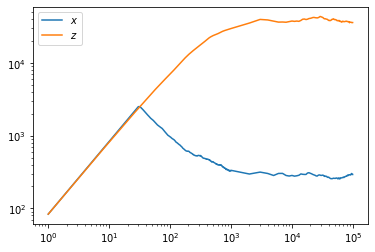

In [10]:
from modules.Observer import Plotter
import matplotlib.pyplot as plt
plt.plot(times, kappa_xx, label='$x$')
plt.plot(times, kappa_zz, label='$z$')
plt.legend()
plt.loglog()
plt.show()

In [2]:
plt.plot(time, kappas[0], label='$\kappa_\parallel$')
plt.plot(time, kappas[1], label='$\kappa_\perp$')
plt.loglog()
plt.legend()
plt.show()

NameError: name 'time' is not defined

In [ ]:
plotter = Plotter()
data = simulation.distribution(0)
plotter.distribution(data)

In [3]:
from numba import jit
import numpy as np

In [26]:
def random_movements():
    np.random.randint(5, size=(500, 10**5))
   
@jit(nopython=True)
def fast_random():
    for i in range(5*10**7):
        np.random.random()

In [27]:
%timeit random_movements()
%timeit fast_random()

578 ms ± 6.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
59.5 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
